In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

dat = pd.read_csv('../data/weather_data.csv', skiprows=[0, 1, 2, 3, 4, 5], encoding="cp949")
dat

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2011-01-01,108,-6.8,-10.4,-2.9
1,2011-01-02,108,-5.4,-8.5,-1.2
2,2011-01-03,108,-4.5,-8.5,-0.3
3,2011-01-04,108,-3.9,-7.4,-1.7
4,2011-01-05,108,-4.0,-7.7,-1.8
5,2011-01-06,108,-7.6,-9.8,-4.6
6,2011-01-07,108,-7.0,-10.6,-2.9
7,2011-01-08,108,-3.6,-8.2,0.1
8,2011-01-09,108,-7.0,-10.3,-0.3
9,2011-01-10,108,-8.2,-11.8,-4.6


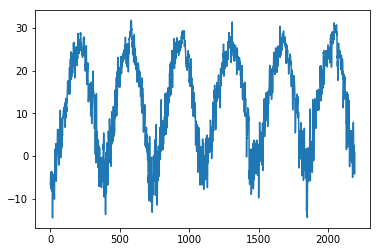

In [2]:
temp = dat['평균기온(℃)']
temp.plot()
plt.show()

In [3]:
train_x = temp[:1461]
test_x = temp[1461:]

train_x = np.array(train_x)
test_x = np.array(test_x)

In [4]:
ATTR_SIZE = 180

tmp = []
train_X = []

for i in range(0, len(train_x) - ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE])
train_X = np.array(tmp)

pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6
5,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,...,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5
6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,...,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3
7,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,...,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6
8,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,...,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6,22.9
9,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,...,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6,22.9,22.4


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(180, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 180)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [6]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model

Net(
  (fc1): Linear(in_features=180, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=180, bias=True)
)

In [7]:
for epoch in range(1000):
    total_loss = 0
    d = []
    for i in range(100): # 배치라기 보다는 100개만 추출
        index = np.random.randint(0, 1281)
        d.append(train_X[index])
    d = np.array(d, dtype='float32')
    d = Variable(torch.from_numpy(d))
    
    optimizer.zero_grad()
    output = model(d)
    loss = criterion(output, d)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

100 7.9752702713012695
200 8.193988800048828
300 8.29375171661377
400 7.622980117797852
500 6.726644039154053
600 6.274468898773193
700 5.999194622039795
800 5.429142951965332
900 5.190947532653809
1000 4.551614761352539


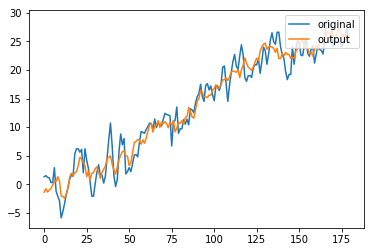

In [8]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

In [9]:
tmp = []
test_X = []

for i in range(0, 720, ATTR_SIZE):
    tmp.append(test_x[i:i+ATTR_SIZE])
test_X = np.array(tmp, dtype='float32')

pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-7.7,-6.000000,-2.700000,2.500000,3.700000,-3.200000,-5.500000,-5.1,-2.1,-0.3,...,19.600000,22.4,24.0,24.700001,25.700001,24.799999,21.000000,25.200001,25.400000,25.700001
1,24.4,23.700001,23.700001,23.299999,24.100000,24.200001,25.299999,25.6,23.4,26.5,...,-4.600000,-3.3,-0.1,1.500000,2.200000,3.100000,5.900000,1.500000,-0.800000,0.900000
2,-5.7,-5.700000,-3.200000,0.300000,0.700000,1.200000,5.700000,6.5,2.0,-2.7,...,23.799999,20.9,20.9,23.799999,24.500000,24.100000,24.700001,26.000000,24.299999,24.700001
3,23.1,22.799999,24.400000,24.400000,24.700001,25.299999,24.600000,24.0,23.5,23.5,...,-1.100000,2.3,3.4,-1.400000,-5.000000,-4.700000,2.700000,4.900000,7.200000,7.600000


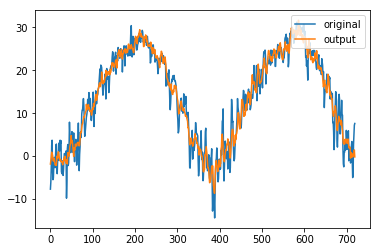

In [10]:
d = Variable(torch.from_numpy(test_X))
output = model(d)

plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='output')
plt.legend(loc='upper right')
plt.show()

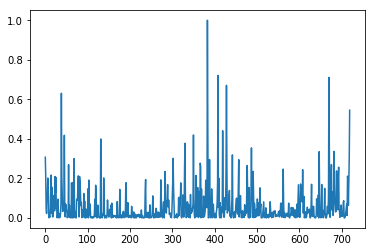

In [11]:
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []
for i in range(0, 720):
    dist = test[i] - pred[i]
    score = pow(dist, 2)
    total_score.append(score)
    
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

plt.plot(total_score)
plt.show()